In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, roc_auc_score, confusion_matrix
import re
import string

In [2]:
# Read in the Fake.csv and True.csv files as dataframes
df0 = pd.read_csv(r'C:\Users\pushk\OneDrive - Durham College\AI\Sem-2\AI IN ENTERPRISE SYSTEMS\Project Code\Fake.csv')
df1 = pd.read_csv(r'C:\Users\pushk\OneDrive - Durham College\AI\Sem-2\AI IN ENTERPRISE SYSTEMS\Project CodeTrue.csv')

In [3]:
df0.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df1.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
# Add a "Class" column to each dataframe, where 0 represents "fake" and 1 represents "true"
df0["Class"] = 0
df1["Class"] = 1

In [6]:
df0.shape

(23481, 5)

In [7]:
df1.shape

(21417, 5)

In [8]:
#merging the columns
# Concatenate the two dataframes vertically into one dataframe
df_merge = pd.concat([df0, df1], axis =0 )
# Display the first 10 rows of the merged dataframe
df_merge.head(10)

,title,text,subject,date,Class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


### Data Cleaning and EDA

In [9]:
#merging the columns from both Dataframes, and making it into one.
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'Class'], dtype='object')

In [10]:
# Drop the "title", "subject", and "date" columns from the dataframe
df = df_merge.drop(["title", "subject","date"], axis = 1)

In [11]:
#Checking for null values
df.isnull().sum()

text     0
Class    0
dtype: int64

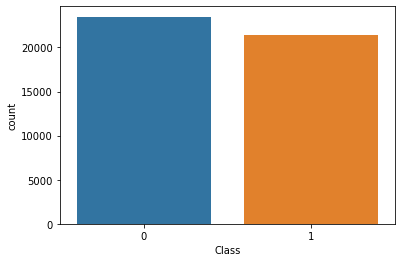

In [12]:
#create a bar plot of the counts of the two classes (fake and true) in the DataFrame
sns.countplot(x="Class", data=df)
plt.show()

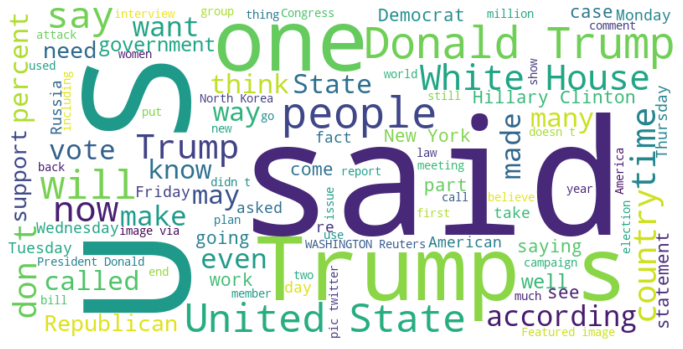

In [13]:
from wordcloud import WordCloud
# Join all the text from the "text" column into one string
text = " ".join(df["text"].values)

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color="white").generate(text)

# Display the generated image
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [14]:
#shuffling the rows of the DataFrame df randomly, so that the rows are in a random order.
df = df.sample(frac = 1)
df.head(10)

,text,Class
3844,Who doesn t love Leslie Knope? She even wormed...,0
16531,Next stop after BREXIT is the US! Judge Jeanin...,0
5873,When even Fox News begins to call for gun cont...,0
13379,You don t want to miss a second of Judge Jeani...,0
20681,It s good to be worth tens of millions of doll...,0
6753,WASHINGTON (Reuters) - U.S. Securities and Exc...,1
902,Despite claiming to look forward to the second...,0
8447,MEXICO CITY (Reuters) - Mexican President Enri...,1
14518,Being sent to Russia for misbehavior may be ju...,0
7126,NEW YORK/WASHINGTON (Reuters) - U.S. President...,1


In [15]:
# Reset the index of the dataframe and drop the old index column
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [16]:
df.columns

Index(['text', 'Class'], dtype='object')

In [17]:
# Define a function to clean the text data by converting to lowercase, removing URLs, removing special characters, etc.
def wp(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [18]:
# Apply the cleaning function to the "text" column of the dataframe
df["text"] = df["text"].apply(wp)

In [19]:
#Divinding into Dependant and Independent Variables.
x = df["text"]
y = df["Class"]

In [20]:
# Split the data into training and testing sets using a 80:20 split and a random seed of 0
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

In [21]:
# Vectorize the text data using the TfidfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [22]:
#Saving the model into a package which can be accesed by any machine.
import pickle
pickle.dump(vectorization, open('transform.pkl','wb'))

In [23]:
# Train a logistic regression model on the training data and generate predictions on the testing data
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(xv_train,y_train)

LogisticRegression()

In [24]:
#using the trained logistic regression model (lr) to predict the class labels of the test data (xv_test), 
#and assigning the predicted labels to the variable pred_lr
pred_lr=lr.predict(xv_test)

In [25]:
# Print a classification report to evaluate the performance of the model
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4704
           1       0.98      0.99      0.99      4276

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [26]:
# Calculate and print the accuracy score of the model
accuracy_score(y_test, pred_lr)

0.987750556792873

In [27]:
# Compute AUC
proba_lr = lr.predict_proba(xv_test)
auc_lr = roc_auc_score(y_test, proba_lr[:, 1])
print('AUC:', auc_lr)

AUC: 0.99858115896031


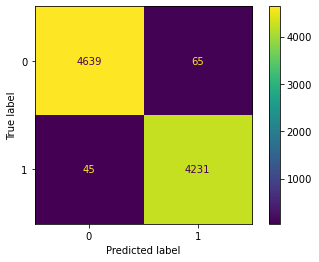

In [28]:
# Plot confusion matrix
cm = confusion_matrix(y_test, pred_lr, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=lr.classes_)
disp.plot()
plt.show()

[learning_curve] Training set sizes: [ 2873  5746  8620 11493 14367 17240 20113 22987 25860 28734]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   18.5s finished


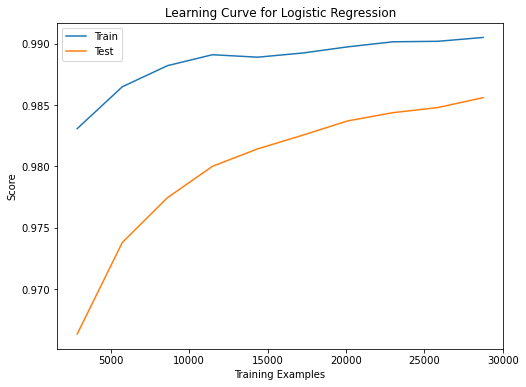

In [29]:
# Generate a learning curve for the logistic regression model using the training data
from sklearn.model_selection import learning_curve
# Add learning curve
train_sizes, train_scores, test_scores = learning_curve(
    lr, xv_train, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    verbose=1)
# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test')
plt.title('Learning Curve for Logistic Regression')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend()
plt.show()

In [30]:
#for name,lr_model in [('LogisticRegression', GradientBoostingRegressor(learning_rate=0.04, max_depth=4, n_estimators=1500,
                          #subsample=0.9, random_state=0))]:
#    gbr_model.fit(x_full,y)
#    pickle.dump(gbr_model, open('gbr.pkl','wb'))